<a href="https://colab.research.google.com/github/Mechanics-Mechatronics-and-Robotics/PytorchBasics/blob/main/14_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

#from google.colab import drive

## Initialization

In [2]:
#device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [16]:
num_classes = 10
num_epoch = 24
batch_size = 4

lr = 0.0001

PATH = './cnn.pth'

# Create data sets and data loaders

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

In [5]:
classes = ('plane', 'car', 'bird', 'cat', 
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [6]:
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                           transform=transform, download=True)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           transform=transform, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [7]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [8]:
examples = iter(train_loader)
samples, labels = examples.next()

print(samples.shape, labels.shape)

torch.Size([4, 3, 32, 32]) torch.Size([4])


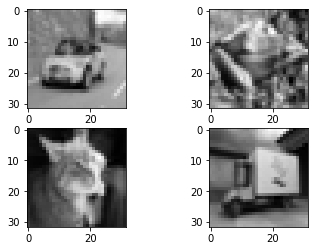

In [9]:
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(samples[i][0], cmap = 'gray')

# Neural network architecture

In [10]:
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)

    return x


In [11]:
model = ConvNet().to(device)

# Loss and optimizer

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# Training

In [20]:
n_total_steps = len(train_loader)

for epoch in range(num_epoch):
  for i, (images, labels) in enumerate(train_loader):
    #100, 1, 28, 28
    #100, 784 
    images = images.to(device)
    labels = labels.to(device)

    #forward
    outputs = model(images)
    loss = criterion(outputs, labels)

    #backwards
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i-1) % 100 == 0:
      print(f'Epoch [{epoch+1}/{num_epoch}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')


Epoch [1/24], Step [2/12500], Loss: 0.7414
Epoch [1/24], Step [102/12500], Loss: 1.2628
Epoch [1/24], Step [202/12500], Loss: 0.2905
Epoch [1/24], Step [302/12500], Loss: 0.5834
Epoch [1/24], Step [402/12500], Loss: 0.2316
Epoch [1/24], Step [502/12500], Loss: 0.1421
Epoch [1/24], Step [602/12500], Loss: 0.4348
Epoch [1/24], Step [702/12500], Loss: 0.4682
Epoch [1/24], Step [802/12500], Loss: 0.8208
Epoch [1/24], Step [902/12500], Loss: 1.4647
Epoch [1/24], Step [1002/12500], Loss: 0.7195
Epoch [1/24], Step [1102/12500], Loss: 0.1564
Epoch [1/24], Step [1202/12500], Loss: 0.2400
Epoch [1/24], Step [1302/12500], Loss: 1.0250
Epoch [1/24], Step [1402/12500], Loss: 0.4663
Epoch [1/24], Step [1502/12500], Loss: 1.1078
Epoch [1/24], Step [1602/12500], Loss: 0.8274
Epoch [1/24], Step [1702/12500], Loss: 0.2818
Epoch [1/24], Step [1802/12500], Loss: 0.7492
Epoch [1/24], Step [1902/12500], Loss: 0.7928
Epoch [1/24], Step [2002/12500], Loss: 0.6183
Epoch [1/24], Step [2102/12500], Loss: 0.4936


KeyboardInterrupt: ignored

In [18]:
torch.save(model.state_dict(), PATH)

# Test

In [19]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')



Accuracy of the network: 64.5 %
Accuracy of plane: 72.0 %
Accuracy of car: 73.1 %
Accuracy of bird: 55.3 %
Accuracy of cat: 58.5 %
Accuracy of deer: 54.9 %
Accuracy of dog: 42.1 %
Accuracy of frog: 72.0 %
Accuracy of horse: 66.5 %
Accuracy of ship: 78.5 %
Accuracy of truck: 72.1 %
